# Dimensionality reduction

Reducing size of our data enables us to perform:

- data compression
- ease learning algorithms

## Eigenvectors and Eigenvalues

if v is a vector that is not zero, then it is an eigenvector of a square matrix A if Av is a scalar multiple of v. This condition could be written as the equation

$Av = \lambda v$

## PCA

PCA allows approximation of any point through a set of parameters with a lower dimension.

1. Compute average of training set X.
2. Compute covariance S.
3. Compute eigenvectors φi and eigenvalues λi of covariance matrix S, in ordered way.

The eigenvector set is given by:
Φ = {φ1, φ2, . . . , φt} 

containing all of t eigenvector corresponding to highest eigenvalues.
Additionally, there is lower dimensional vector t given by projecting
the original training set in the eigenvector space b = ΦT (x − x).
Thus, it is possible approximate any value from original space through equation:
    
x ≈ x+Φb.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/GaussianScatterPCA.png/440px-GaussianScatterPCA.png" />

Code based on this implementation of [PCA!](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html)

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

import numpy as np

Create two sample arrays changing covariance

In [117]:
np.random.seed(1)

In [118]:
N = 20

mu1 = np.array([0,0,0])
cov1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1 = np.random.multivariate_normal(mu1, cov1, N)

mu2 = np.array([1,1,1])
cov2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2 = np.random.multivariate_normal(mu2, cov2, N)

In [119]:
print class1.shape

(20, 3)


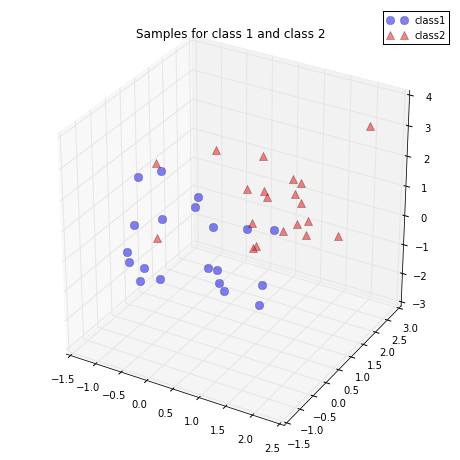

In [120]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(class1[:, 0], class1[:, 1], class1[:, 2], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2[:, 0], class2[:, 1], class2[:, 2], '^', markersize=8, color='red', alpha=0.5, label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')
plt.show()

This method considers all samples independently of class.

Therefore it is necessary to pack them togheter

In [121]:
samples = np.vstack((class1, class2))
print samples.shape

(40, 3)


In [122]:
mean = samples.mean(axis=0)
print mean

[ 0.41667492  0.69848315  0.49242335]


In [123]:
cov = np.cov(samples.T)
print cov

[[ 0.9868668   0.26943262  0.2855759 ]
 [ 0.26943262  0.92914135  0.30682016]
 [ 0.2855759   0.30682016  1.27528118]]


Each column of eigenvector is $u_{i}$

In [124]:
eig_val, eig_vec = np.linalg.eig(cov)
print 'Eigen values', eig_val
print 'Eigen vec \n', eig_vec.T

Eigen values [ 1.67100943  0.83832597  0.68195393]
Eigen vec 
[[-0.49210223 -0.47927902 -0.72672348]
 [-0.64670286 -0.35756937  0.67373552]
 [ 0.58276136 -0.8015209   0.13399043]]


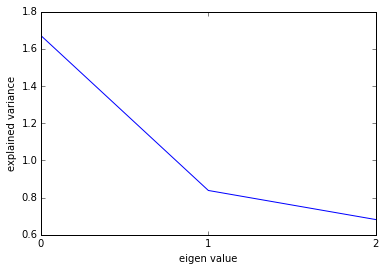

In [125]:
plt.plot(eig_val)
plt.xticks([0, 1, 2])

plt.xlabel('eigen value')
plt.ylabel('explained variance')
plt.show()

In [126]:
x,y,z = samples.mean(axis=0)

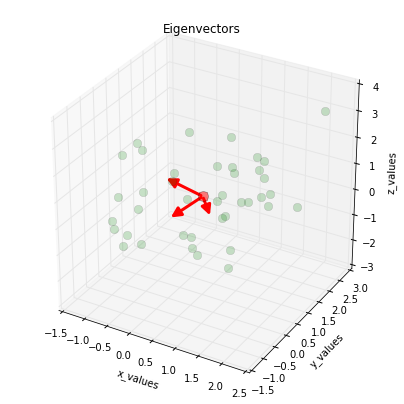

In [127]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)


x, y, z = samples.mean(axis=0)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(samples[:, 0], samples[:, 1], samples[:, 2], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([x], [y], [z], 'o', markersize=10, color='red', alpha=0.5)

for v in eig_vec.T:
    a = Arrow3D([x, v[0] + x], [y, v[1] + y], [z, v[2] + z], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
    
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

Sort eigenvectors by their correspondent eigenvalue

In [128]:
V = eig_vec.T[:2,:]

In [129]:
transformed = V.dot(samples.T).T

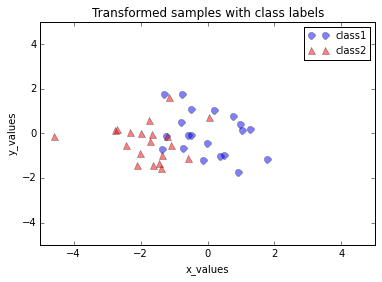

In [130]:
plt.plot(transformed[:20, 0], transformed[:20, 1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[20:, 0], transformed[20:, 1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

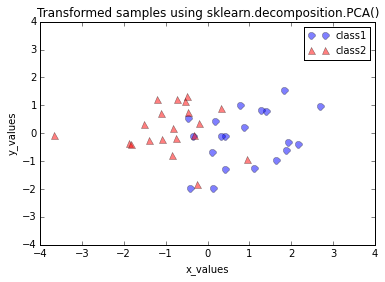

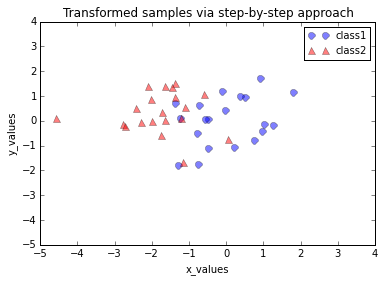

In [131]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(samples)

plt.plot(sklearn_transf[:20, 0], sklearn_transf[:20, 1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:, 0], sklearn_transf[20:, 1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples using sklearn.decomposition.PCA()')
plt.show()


#### Compare with step-by-step approach
tf = transformed
tf[:, 1] = tf[:, 1]*(-1) # invert the PC2 axis

plt.plot(tf[:20, 0], tf[:20, 1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(tf[20:, 0], tf[20:, 1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,4])
plt.ylim([-5,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples via step-by-step approach')
plt.show()

## Application example: eigenfaces

This example illustrate some of the most widely used approaches to PCA.


1. Read a set of high dimensional images
1. Apply pca transform
1. Project original images into lower dimensional space (pca space).
1. Project back

In [163]:
import glob
import cv2

In [164]:
filenames = glob.glob('/Users/danilonunes/Dropbox/pme406eletrica/cropped/*.jpg')

In [165]:
images = np.asarray([cv2.imread(f, 0).flatten() for f in filenames])

Some random image

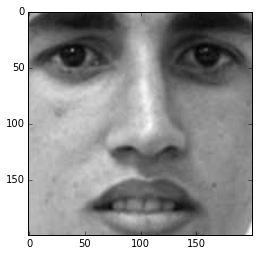

In [166]:
plt.imshow(images[0, :].reshape(200, 200), cmap='gray')

In [150]:
skpca = sklearnPCA(n_components=2)
sktransf = skpca.fit_transform(images)

Now we can transform a image into lower dimension

In [168]:
data = skpca.transform(images[0, :].reshape(1, -1))
print 'Image now is', data

Image now is [[-4053.41937387 -1243.49537381]]


We reconstruct image from two major eigenvalues

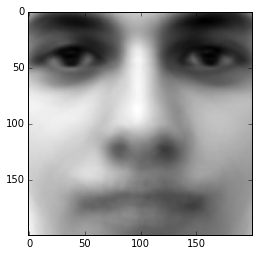

In [170]:
plt.imshow(skpca.inverse_transform(data).reshape(200, 200), cmap='gray')